### Question 8 
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

In [2]:

import requests
import json
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import csv
from datetime import datetime
from bs4 import BeautifulSoup

In [4]:
# API endpoint
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send GET request to the API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Get the JSON data from the response
    data = response.json()
    
    # Extract the episodes data
    episodes = data["_embedded"]["episodes"]
    
    # Initialize a list to store the extracted episode data
    episodes_data = []
    
    # Iterate over each episode and extract the required attributes
    for episode in episodes:
        episode_data = {
            "id": episode["id"],
            "url": episode["url"],
            "name": episode["name"],
            "season": episode["season"],
            "number": episode["number"],
            "type": episode["type"],
            "airdate": datetime.strptime(episode["airdate"], "%Y-%m-%d").date(),
            "airtime": datetime.strptime(episode["airtime"], "%H:%M").strftime("%I:%M %p"),
            "runtime": episode["runtime"],
            "average rating": episode["rating"]["average"],
            "summary": episode["summary"].replace("<p>", "").replace("</p>", ""),
            "medium image link": episode["image"]["medium"],
            "original image link": episode["image"]["original"]
        }
        episodes_data.append(episode_data)
    
    # Create a dataframe from the extracted attributes
    dataset = pd.DataFrame(episodes_data)
else:
    print("Error:", response.status_code)

,id,url,name,season,number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


### 1. Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.


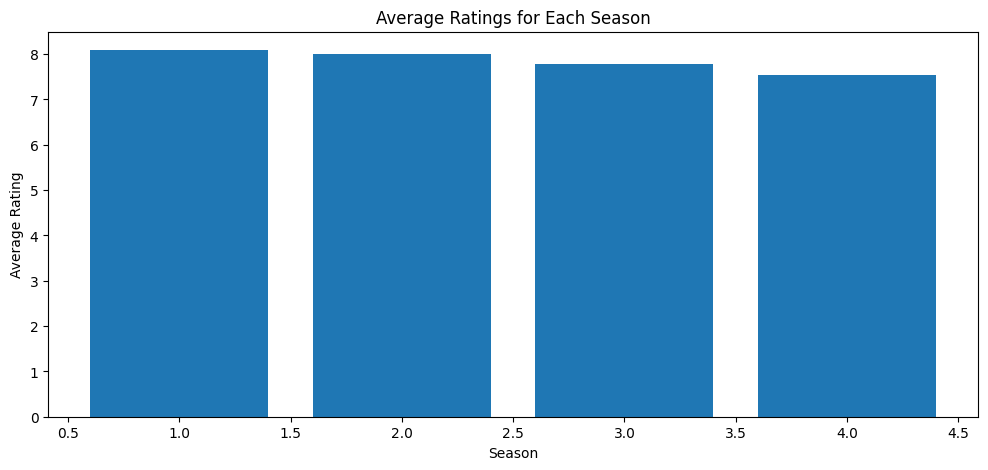

In [5]:
#Creating a variable and filtering records as per problem statement
season_ratings = dataset.groupby("season")["average rating"].mean().reset_index()

# Plotting the ratings for each seasons

plt.figure(figsize=(12, 5))
plt.bar(season_ratings["season"], season_ratings["average rating"])
plt.xlabel("Season")
plt.ylabel("Average Rating")
plt.title("Average Ratings for Each Season")
plt.show()

### 2. Get all the episode names, whose average rating is more than 8 for every season.

In [7]:
# Filter the dataset to only include episodes with an average rating greater than 8
episode_names_by_season = dataset[dataset['average rating'] > 8].groupby('season')['name'].apply(list)

# Iterate over each item in the episode_names_by_season Series
for i, j in episode_names_by_season.items():
    # Print the season number and list of episode names
    print(f"Season {i}: {j}")

Season 1: ["Trompe L'Oeil", 'The Well-Tempered Clavier', 'The Bicameral Mind']
Season 2: ['Kiksuya', 'Vanishing Point', 'The Passenger']


### 3. Get all the episode names that aired before May 2019

In [13]:
if response.status_code == 200:
    # Get the JSON data from the response
    data = response.json()
    
    # Extract the episodes data
    episodes = data["_embedded"]["episodes"]
    
    # Define the cutoff date
    cutoff_date = datetime(2019, 5, 1)
    
    # Initialize a list to store the episode names
    episode_names = []
    
    # Iterate over each episode and check if it aired before the cutoff date
    for episode in episodes:
        airdate = datetime.strptime(episode["airdate"], "%Y-%m-%d")
        if airdate < cutoff_date:
            episode_names.append(episode["name"])
    
    # Print the episode names
    for name in episode_names:
        print(name)
else:
    print("Error:", response.status_code)

The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger


### 4. Get the episode name from each season with the highest and lowest rating

In [24]:
seasons = {}

for episode in episodes:
    season_number = episode["season"]
    if season_number not in seasons:
        seasons[season_number] = {"highest": episode, "lowest": episode}
    else:
        if episode["rating"]["average"] > seasons[season_number]["highest"]["rating"]["average"]:
            seasons[season_number]["highest"] = episode
        if episode["rating"]["average"] < seasons[season_number]["lowest"]["rating"]["average"]:
            seasons[season_number]["lowest"] = episode

for season_number, season_data in seasons.items():
    print(f"Season {season_number}:")
    print(f"Highest rated episode: {season_data['highest']['name']}")
    print(f"Lowest rated episode: {season_data['lowest']['name']}")

Season 1:
Highest rated episode: The Bicameral Mind
Lowest rated episode: The Stray
Season 2:
Highest rated episode: Kiksuya
Lowest rated episode: Akane No Mai
Season 3:
Highest rated episode: Parce Domine
Lowest rated episode: Decoherence
Season 4:
Highest rated episode: Zhuangzi
Lowest rated episode: The Auguries


### 5. Get the summary for the most popular ( ratings ) episode in every season

In [27]:
# Get the list of episodes from the data
episodes = data["_embedded"]["episodes"]
# Create an empty dictionary to store the most popular episode for each season
seasons = {}

# Loop through each episode in the list of episodes
for episode in episodes:
    # Get the season number for this episode
    season_number = episode["season"]
    
    # Check if this season is not already in the dictionary
    if season_number not in seasons:
        # If it's not, add this episode as the most popular for this season
        seasons[season_number] = episode
    else:
        # If it is, check if this episode has a higher rating than the current most popular episode for this season
        if episode["rating"]["average"] > seasons[season_number]["rating"]["average"]:
            # If it does, update the most popular episode for this season to be this episode
            seasons[season_number] = episode

# Loop through each season in the dictionary
for season_number, season_data in seasons.items():
    # Print out the season number
    print(f"Season {season_number}:")
    
    # Print out the name of the most popular episode for this season
    print(f"Most popular episode: {season_data['name']}")
    
    # Get the summary text and strip any HTML tags from it using BeautifulSoup
    summary_text = BeautifulSoup(season_data['summary'], "html.parser").get_text()
    
    # Print out the summary text without HTML tags
    print(f"Summary: {summary_text}")

Season 1:
Most popular episode: The Bicameral Mind
Summary: Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.
Season 2:
Most popular episode: Kiksuya
Summary: Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.
Season 3:
Most popular episode: Parce Domine
Summary: If you're stuck in a loop, try walking in a straight line.
Season 4:
Most popular episode: Zhuangzi
Summary: God is bored.
